# Analyse von IoT Daten mit Jupyter Notebooks
Voraussetzung für dieses Notebook ist, dass Sie Zugriff auf eine AWS IoT Dataset haben, das Daten enthält. Die entsprechende Konfiguration wurde in der Vorlesung gezeigt. 

Um die IoT Daten aus dem Datenset auslesen zu können sind folgende Schritte notwendig:
1. Installation notwendigen Tools
    - AWS Command Line Interfaces (CLI)
    - AWS Python SDKs
2. Konfiguration des Zugriffs
    - AWS Access Key erstellen
    - AWS CLI konfigurieren 


## Installation der notewendigen Tools
Laden Sie die aktuelle Version des AWS CLI für Ihr Betriebssystem [hier](https://aws.amazon.com/cli/) herunter. Installieren Sie anschließend das AWS CLI.

Die Installation des [AWS Python SDKs](https://aws.amazon.com/sdk-for-python/) erfolgt über `pip`. Führe Sie dazu folgenden Befehl aus:
```shell
pip install boto3
```
Falls Sie mit virtuellen Environments arbeiten müssen Sie sicher stellen, dass das AWS Python SDK
auch dort installiert wird (z.B. über die entsprechende Funktion in Ihrer IDE).

## Konfiguration des Zugriffs
Zunächst muss eine Access Key für den Zugriff über den AWS Python SDK erstellt werden.
1. Öffnen Sie hierzu die [AWS Console](https://console.aws.amazon.com/). 
2. Navigieren Sie dann zu dem IAM-Service.
3. Öffnen Sie Ihren User und navigieren Sie zu dem Reiter "Sicherheitsanmeldeinformationen"
4. Klicken Sie auf "Zugriffsschlüssel erstellen".
5. Nachdem der Zugriffsschlüssel angelegt wurde speichern Sie sich die "Zugriffsschlüssel-ID" sowie den "Geheimen Zugriffsschlüssel" 

Nachdem der Zugriffschlüssel erstellt ist können Sie den Zugriff über den AWS Python SDK mit Hilfe des AWS CLI 
konfigurieren. Führen Sie dazu den folgenden Befehl
```shell 
aws configure
```
Geben Sie die notewendigen Informationen an. Dies sind:
 - Access key ID = Zugriffsschlüssel-ID
 - Secret access key = Geheimer Zugriffsschlüssel
 - AWS Region = Die von Ihnen verwendete Region (z.B. eu-central-1).
 
Damit ist die Konfiguration abgeschlossen und Sie können nun IoT Daten aus dem Datenset auslesen und
diese auswerten.



# Beispiel: IoT Daten mit Matplotlib darstellen
Zunächst wir das Jupyter-Notebook-Commando `%matplotlib inline`verwendet um die Inline-Darstellung der 
Graphiken zu aktivieren.

In [2]:
%matplotlib inline

Danach wird die `boto3` Bibliothek importiert und eine `iotanalytics` Client erstellt. Mit diesem kann dann das 
AWS IoT Analytics Datenset ausgelesen werden. Hierzu muss der korrekte Name des Datensets übergeben werden. 

In [6]:
import boto3

client = boto3.client('iotanalytics')
data = client.get_dataset_content(datasetName='myiotanalytics_dataset')

Der Zugriff auf die Daten erfolgt über eine URI, die auf eine CSV-Datei zeigt, die die Daten enthält. Diese CSV-Datei kann dann z.B. mit `Pandas` eingelesen werden. Gegebenenfalls müssen Sie vorher noch die Pandas-Bibliothek installieren (`pip install pandas`).

In [7]:
import pandas

df = pandas.read_csv(data["entries"][0]["dataURI"])
df

,humidity,timestamp,temperature,__dt
0,55,2021-04-05T14:35:26,22,2021-04-05 00:00:00.000
1,54,2021-04-05T14:35:31,22,2021-04-05 00:00:00.000
2,54,2021-04-05T14:35:37,22,2021-04-05 00:00:00.000
3,54,2021-04-05T14:35:42,22,2021-04-05 00:00:00.000
4,54,2021-04-05T14:35:47,22,2021-04-05 00:00:00.000
...,...,...,...,...
130,41,2021-04-05T13:36:34,22,2021-04-05 00:00:00.000
131,41,2021-04-05T13:36:39,22,2021-04-05 00:00:00.000
132,41,2021-04-05T13:36:44,22,2021-04-05 00:00:00.000
133,41,2021-04-05T13:36:49,22,2021-04-05 00:00:00.000


Zuletzt können dann die Daten des Datensets dann mit Matplotlib ausgegeben werden.

Text(0.5, 0, 'Date')

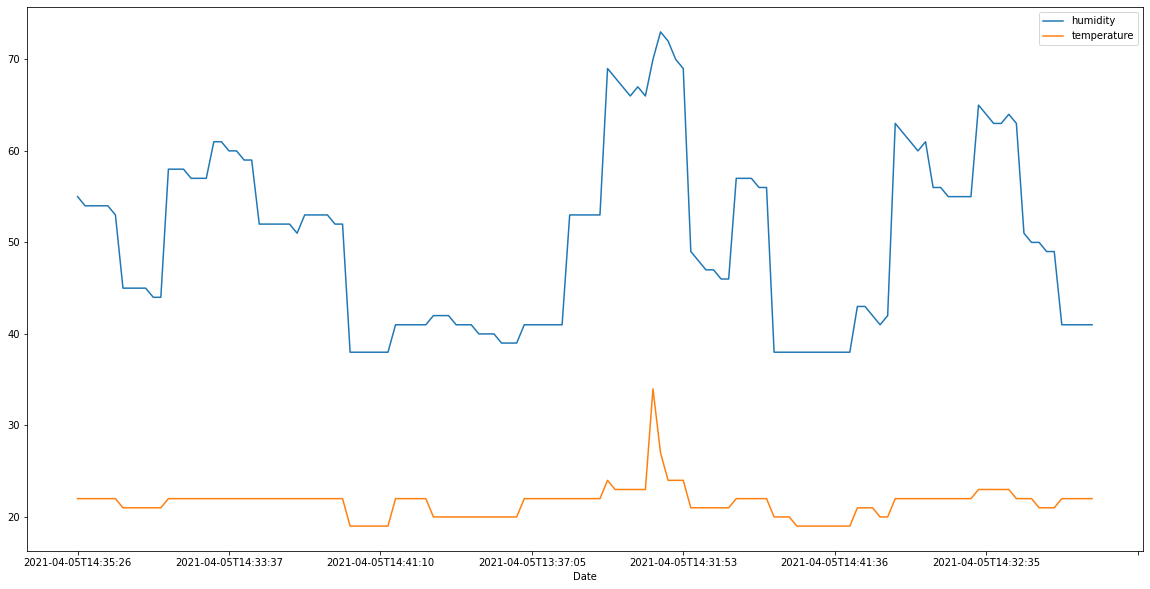

In [8]:
import matplotlib.pyplot as plt

ax = plt.gca()

df.plot(x="timestamp", y="humidity", kind="line", figsize=(20,10), ax=ax)
df.plot(x="timestamp", y="temperature", kind="line", ax=ax)

ax.set_xlabel("Date")